In [1]:
import tensorflow as tf
import os

In [6]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
import cv2
import imghdr

In [9]:
data_dir='data'
image_exts=['jpeg', 'jpg', 'bmp', 'png']

In [10]:

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image.path))
            

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image.path))
            

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 202 files belonging to 2 classes.


In [14]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

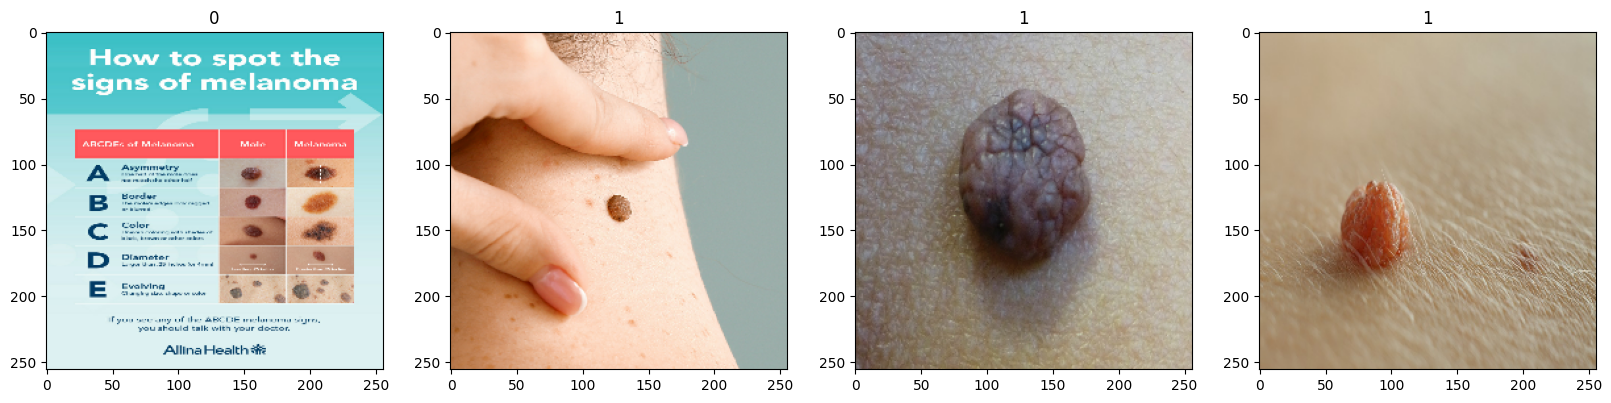

In [15]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data=data.map(lambda x,y:(x/255,y))

In [17]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [18]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model=Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
log_dir='logs'

In [25]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [26]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 4s 398ms/step - loss: 1.8707 - accuracy: 0.4297 - val_loss: 0.8898 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 2s 323ms/step - loss: 0.7578 - accuracy: 0.5625 - val_loss: 0.6755 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 2s 332ms/step - loss: 0.6633 - accuracy: 0.5938 - val_loss: 0.6691 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 2s 309ms/step - loss: 0.6820 - accuracy: 0.5391 - val_loss: 0.6645 - val_accuracy: 0.5625
Epoch 5/20
4/4 [==============================] - 2s 307ms/step - loss: 0.6897 - accuracy: 0.5703 - val_loss: 0.6328 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 2s 313ms/step - loss: 0.6795 - accuracy: 0.5078 - val_loss: 0.6689 - val_accuracy: 0.5625
Epoch 7/20
4/4 [==============================] - 2s 308ms/step - loss: 0.6500 - accuracy: 0.5469 - val_loss: 0.6426 - val_accuracy: 0.5312
Epoch 8/20
4/4 [====

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy